### Initial setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/medical_costs.csv', sep=',', header=0)

### Data transformation & Data analysis

#### Visualise the structure of the dataframe

In [2]:
print(df.head(10).to_string(line_width=1000))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


#### Describe the numerical contents of the dataframe

In [3]:
print(df.describe().to_string(line_width=1000))

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


#### Relevant analysis: relation between age and BMI

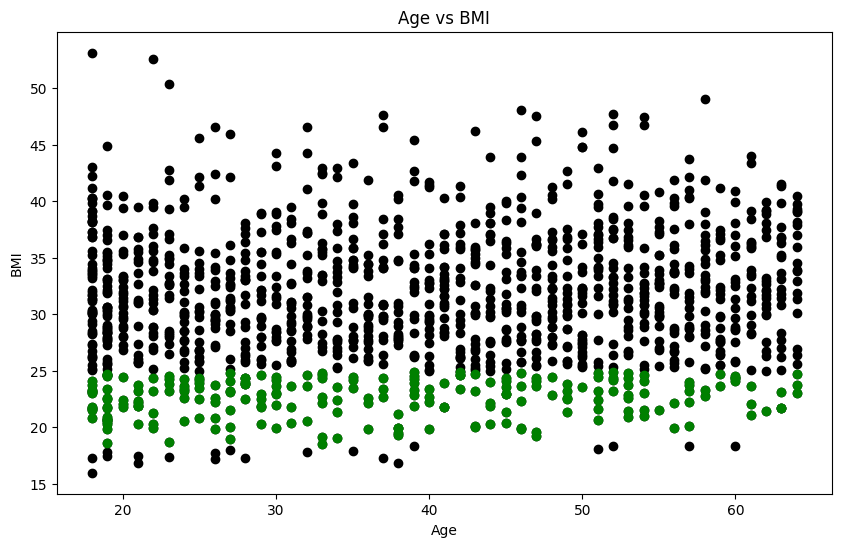

In [5]:
normal_bmi = df[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9)]

plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['bmi'], 'o', color='black')
plt.plot(normal_bmi['age'], normal_bmi['bmi'], 'o', color='green')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

#### Relevant analysis: age distribution in our dataset

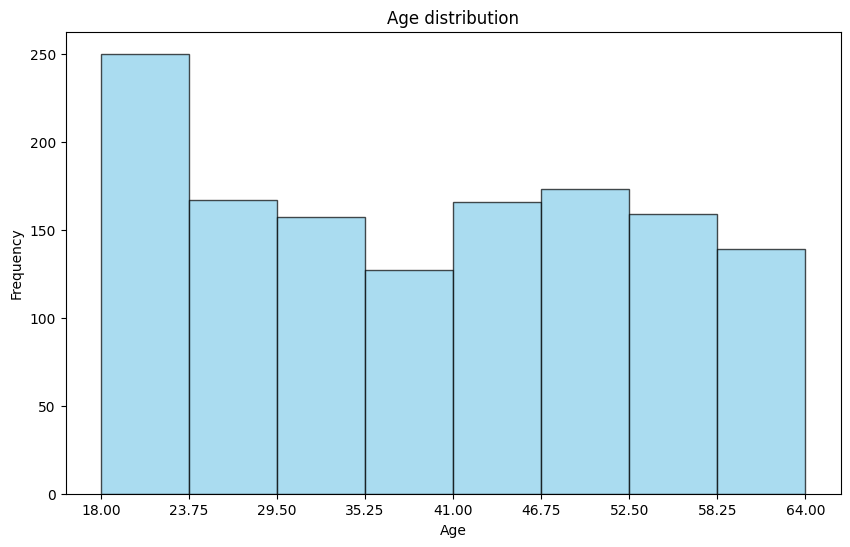

In [23]:
bin_nr = 8
counts, bin_edges = np.histogram(df['age'], bins=bin_nr)


plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=bin_nr, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks(bin_edges)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Relevant analysis: correlation heatmap between numerical values from the dataset

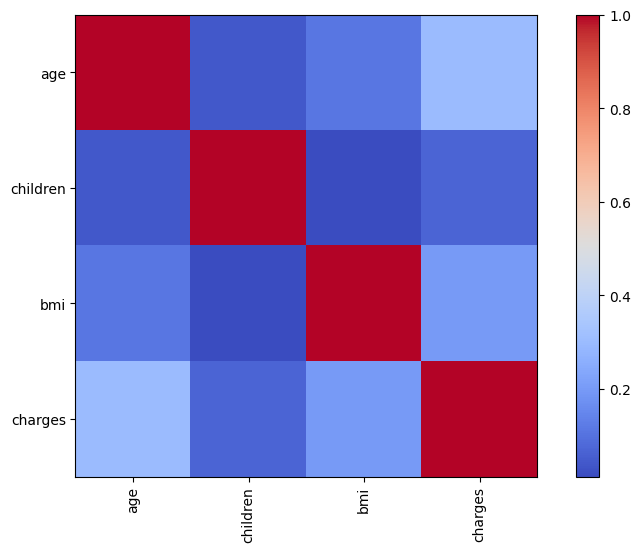

In [26]:
plt.figure(figsize=(10, 6))
correlation_data = df[['age', 'children', 'bmi', 'charges']]
correlation_matrix = correlation_data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

#### Relevant analysis #4

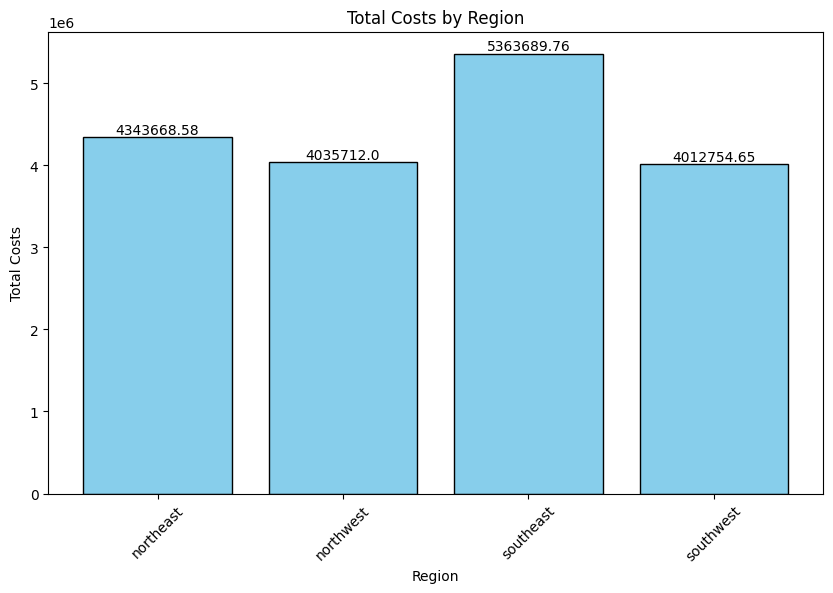

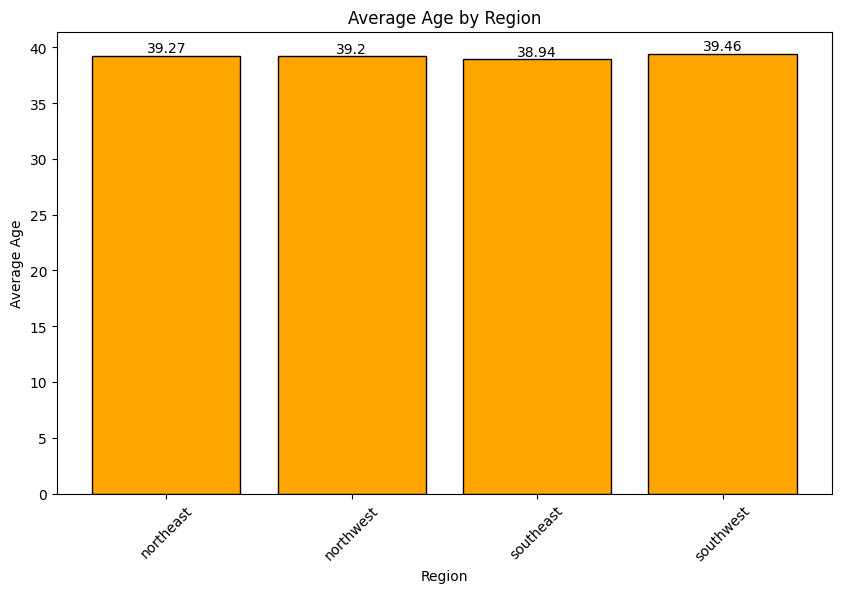

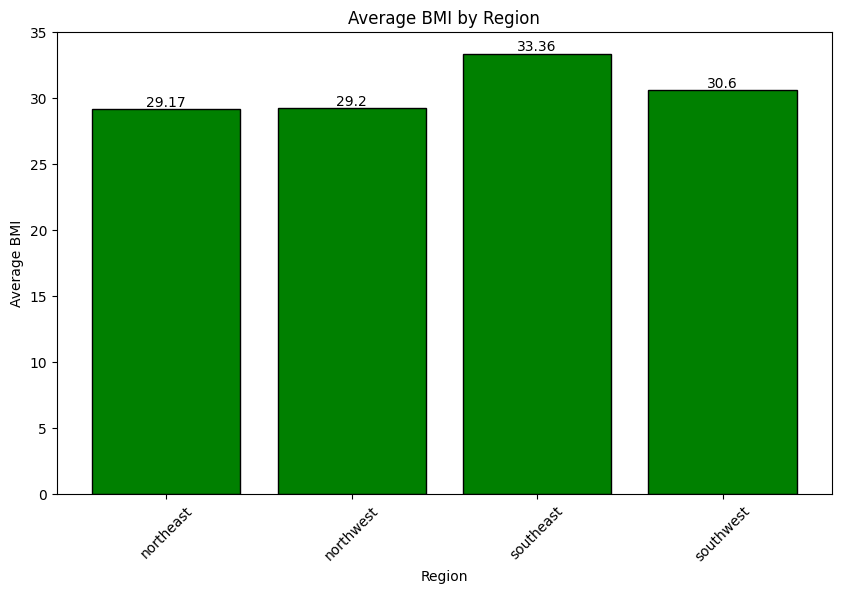

In [38]:
total_costs_by_region = df.groupby('region')['charges'].sum().reset_index()
avg_age_by_region = df.groupby('region')['age'].mean().reset_index()
avg_bmi_by_region = df.groupby('region')['bmi'].mean().reset_index()

# Total costs by Region
plt.figure(figsize=(10, 6))
bars = plt.bar(total_costs_by_region['region'], total_costs_by_region['charges'], color='skyblue', edgecolor='black')
plt.title('Total Costs by Region')
plt.xlabel('Region')
plt.ylabel('Total Costs')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

# Average age by Region
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_age_by_region['region'], avg_age_by_region['age'], color='orange', edgecolor='black')
plt.title('Average Age by Region')
plt.xlabel('Region')
plt.ylabel('Average Age')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

# Average BMI by Region
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_bmi_by_region['region'], avg_bmi_by_region['bmi'], color='green', edgecolor='black')
plt.title('Average BMI by Region')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

#### Relevant analysis #5

### Applying Clustering Algorithms